### SETUP

MOVE UP ONE FOLDER

In [1]:
%cd ..

/Users/vjs/Lab/stacker


IMPORTS

In [2]:
import numpy as np
from dasp.algorithms import *
from dasp.visualizations import *


%load_ext autoreload
%autoreload 2
%matplotlib widget

### SINE WAVE CREATION

Numerical Output

signal: 
[ 0.00000000e+00  5.93417105e+00 -1.75792873e-01  1.59381493e+00
 -4.04659267e-01  4.11797441e-01 -8.29838636e-01 -5.67416316e-01
 -2.59366941e+00 -3.68414626e+00  3.15255518e+00  2.89041122e+00
  8.90653378e-01  3.31409657e-01  4.21750910e-01 -7.99040916e-01
  1.47245646e-01 -3.06670078e+00 -1.08095103e+00  1.64540984e-02
  1.55667708e-01  3.80655891e+00 -2.58017081e-01  1.02703767e+00
 -6.33857987e-01 -1.37710831e-02 -1.93502382e+00 -2.39872246e+00
  3.27348163e+00 -3.09237445e+00  1.04346260e+00  2.73051108e+00
  3.26039944e-01  1.08327658e-01 -2.99723541e-02 -1.69578108e+00
 -2.02167787e+00  2.39371769e+00  3.85470071e-01 -2.60116710e+00
  3.09288032e-01  3.04816063e+00 -3.36428308e-01  4.15275731e-01
 -1.21414514e+00 -2.55615053e+00  3.13656556e+00 -2.31794855e-01
  6.01828191e-01 -3.23074560e+00  5.39426518e-01  2.56106610e+00
 -2.73588005e-01 -3.40072381e-01 -2.70374122e+00  2.74696593e+00
  9.68302328e-01 -4.41623870e-01  3.03003924e-01 -3.39178177e+00
  4.57272816e-01

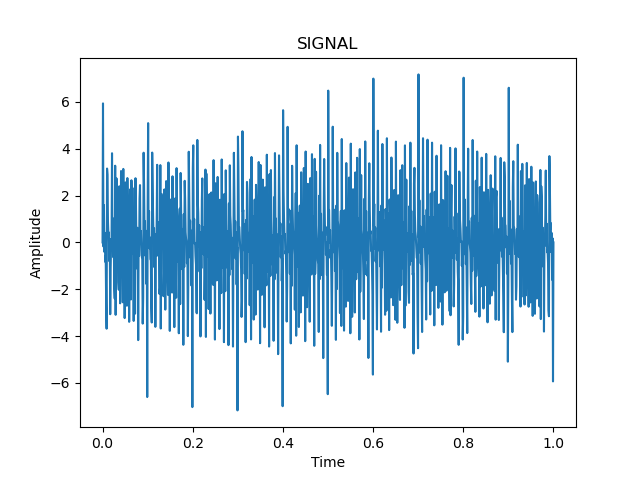

In [3]:
base_frequency = 100  # frequency in hertz
sample_rate = 1_000  # samples per second
duration = 1  # duration of the signal in seconds
wave_type = "base"  # options: "base", "square", "sawtooth", "triangle"
num_signals = 2  # number of signals to include as part of the same sine wave
signal_noise = 0  # scale from 0 to 1

# create signal
signal, time = sine_wave_creator(
    base_freq=base_frequency,
    sample_rate=sample_rate,
    duration=duration,
    wave_type=wave_type,
    num_signals=num_signals,
    noise=signal_noise,
)

print("signal: ")
print(signal)
print("Time: ")
print(time)

# -- example for plotting the created signal
sig_fig, sig_ax = plt.subplots()
sig_ax.set_title("SIGNAL")
sig_fig.canvas.header_visible = False
sig_fig.canvas.footer_visible = False
sig_ax.set_xlabel("Time")
sig_ax.set_ylabel("Amplitude")
sig_ax.plot(time, signal)

Interactive visualization

interactive(children=(IntSlider(value=10, description='base_freq', max=20, min=1), IntSlider(value=1000, descr…

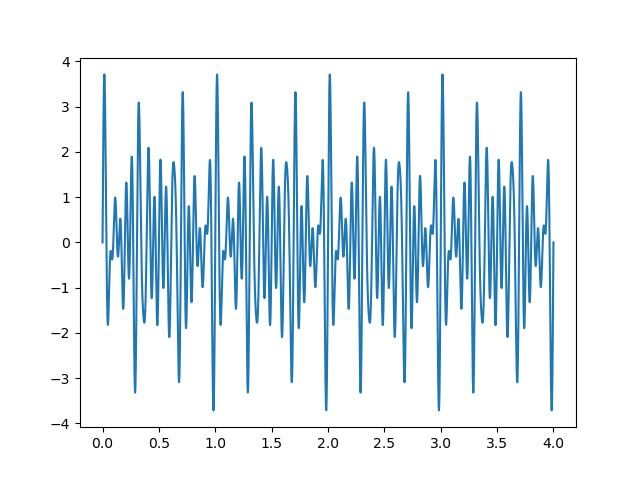

In [4]:
sig_viewer(
    base_freq=10,
    sample_rate=1000,
    duration=1,
    harmonics=0,
    wave_type="base",
    num_signals=4,
)

### Frequency Aligned Signal Projection (FASP)

FASP Array

In [5]:
fasp_array = fasp(signal=signal, num_ffts=np.floor(np.sqrt(signal.size / 2)), use_row_norm=True, use_im_norm=True)

print("FASP Array: ")
print(fasp_array)

FASP Array: 
[[0.03174566 0.03334479 0.04271531 0.13362837 0.12841054 0.18476454
  0.17649452 0.07486893 0.10398691 0.10573899 0.12888046 0.14240429
  0.1579565  0.15117201 0.10451478 0.12436726 0.09986703 0.14870058
  0.11856506 0.08344487 0.08718137 0.07546731]
 [0.02806123 0.02974101 0.03751749 0.11493991 0.12655969 0.15047578
  0.15715212 0.06218137 0.11476401 0.10765874 0.11817466 0.1184639
  0.12941941 0.12740731 0.08824004 0.1094719  0.08330638 0.13102987
  0.10658891 0.08751861 0.09940372 0.07411982]
 [0.02207222 0.0242807  0.02984564 0.09100937 0.11471603 0.10530515
  0.11897733 0.03479712 0.14911686 0.13120924 0.12753058 0.10253146
  0.11462753 0.11445942 0.07973527 0.0985454  0.08362555 0.10416609
  0.07944003 0.07853029 0.1012415  0.04892468]
 [0.03008876 0.03162203 0.03747475 0.09910563 0.13178873 0.13328961
  0.14905759 0.03229791 0.17181015 0.15070998 0.13906887 0.09429569
  0.12012078 0.10965369 0.07085227 0.06591721 0.06601698 0.06232712
  0.05135017 0.05393225 0.07718

Interactive visualization

In [6]:
fasp_viz(raw_signal=signal)

### Horizontally Aligned Signal Projection (HASP)
* Note, these algorithms work with the FFT of the raw signal

Generate FFT

In [7]:
fft = gen_fft(signal)

print("fft: ")
print(fft)

fft: 
[3.22253834e-02 6.44626688e-02 9.67237776e-02 1.29020671e-01
 1.61365369e-01 1.93769973e-01 2.26246680e-01 2.58807813e-01
 2.91465832e-01 3.24233366e-01 3.57123226e-01 3.90148435e-01
 4.23322248e-01 4.56658181e-01 4.90170033e-01 5.23871914e-01
 5.57778278e-01 5.91903946e-01 6.26264144e-01 6.60874532e-01
 6.95751240e-01 7.30910910e-01 7.66370727e-01 8.02148471e-01
 8.38262554e-01 8.74732076e-01 9.11576867e-01 9.48817553e-01
 9.86475607e-01 1.02457342e+00 1.06313436e+00 1.10218286e+00
 1.14174449e+00 1.18184604e+00 1.22251562e+00 1.26378278e+00
 1.30567859e+00 1.34823576e+00 1.39148883e+00 1.43547423e+00
 1.48023053e+00 1.52579852e+00 1.57222149e+00 1.61954538e+00
 1.66781903e+00 1.71709446e+00 1.76742711e+00 1.81887620e+00
 1.87150506e+00 1.92538150e+00 1.98057830e+00 2.03717362e+00
 2.09525163e+00 2.15490305e+00 2.21622589e+00 2.27932620e+00
 2.34431896e+00 2.41132910e+00 2.48049261e+00 2.55195785e+00
 2.62588706e+00 2.70245807e+00 2.78186627e+00 2.86432690e+00
 2.95007771e+00 3.

HASP arrays

In [8]:
fixed_hasp_array = hasp_fixed(
    sample_rate=sample_rate,
    fft=fft,
    bandwidth=base_frequency,  # base_frequency is the max bandwidth, this is to avoid overlap
    freq_center=base_frequency,
    use_row_norm=True,
    use_im_norm=True,
)

decimating_hasp_array = hasp_decim(
    sample_rate=sample_rate,
    fft=fft,
    bandwidth=base_frequency,  # base_frequency is the max bandwidth, this is to avoid overlap
    freq_center=base_frequency,
    use_row_norm=True,
    use_im_norm=True,
)

interpolating_hasp_array = hasp_interp(
    sample_rate=sample_rate,
    fft=fft,
    bandwidth=base_frequency,  # base_frequency is the max bandwidth, this is to avoid overlap
    freq_center=base_frequency,
    use_row_norm=True,
    use_im_norm=True,
)

print("Fixed HASP: ")
print(fixed_hasp_array)
print("Decimating HASP: ")
print(decimating_hasp_array)
print("Interpolating HASP: ")
print(interpolating_hasp_array)

Fixed HASP: 
[[8.18745764e-04 8.13795344e-04 8.06278610e-04 7.98861465e-04
  7.91524168e-04 7.84247564e-04 7.77012915e-04 7.69801737e-04
  7.62595630e-04 7.55376121e-04 7.48124492e-04 7.40821605e-04
  7.33447722e-04 7.25982298e-04 7.18403766e-04 7.10689290e-04
  7.02814485e-04 6.94753109e-04 6.86476687e-04 6.77954095e-04
  6.69151052e-04 6.60029527e-04 6.50547030e-04 6.40655758e-04
  6.30301565e-04 6.19422702e-04 6.07948291e-04 5.95796451e-04
  5.82872010e-04 5.69063717e-04 5.54240885e-04 5.38249463e-04
  5.20907652e-04 5.02001661e-04 4.81283119e-04 4.58472208e-04
  4.33276713e-04 4.05453214e-04 3.74979790e-04 3.42529972e-04
  3.10767899e-04 2.87693919e-04 2.93022718e-04 3.60743899e-04
  5.31237138e-04 8.73262806e-04 1.60423067e-03 3.80158214e-03
  4.45495933e-02 4.28976687e-02 4.47346573e-02 6.40213442e-03
  2.42434630e-03 1.28747504e-03 6.71669323e-04 8.80132216e-04
  1.73756507e-03 3.75147740e-03 4.11239366e-02 4.02829091e-02
  4.05183706e-02 5.10734373e-03 2.48011112e-03 1.45812899

Interactive visualization

In [9]:
hasp_viz(signal = signal, freq_center = base_frequency, sample_rate=sample_rate)

### HASP Interactive Dashboard

In [10]:
HASP_dash(base_freq = 100, sample_rate = 2000, duration = 1, noise = 0, bandwidth = 50, num_signals=1)